In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Import data
df = pd.read_csv('medical_examination.csv')
df.head()
print(df.dtypes)

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [7]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [3]:
# Add 'overweight' column
# Calculate BMI
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

# Add 'overweight' column based on BMI value
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)

df = df.drop('bmi',  axis=1)
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1





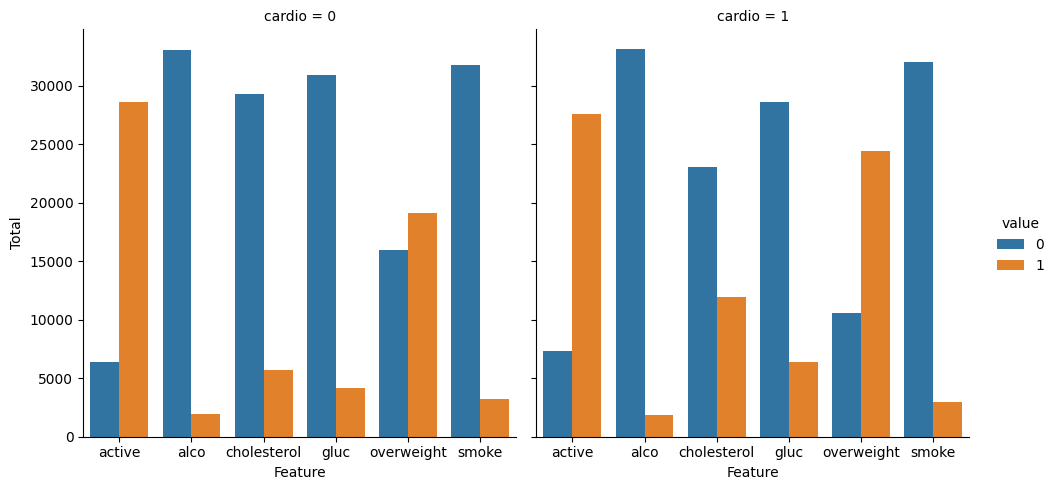

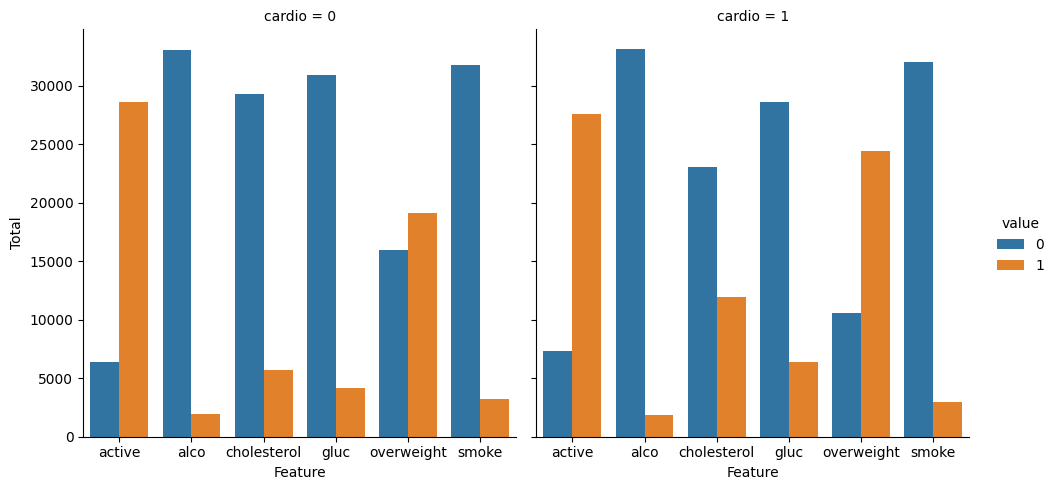

In [21]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    selected_columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    df_cat = pd.melt(df, value_vars=selected_columns, var_name='feature', value_name='value', id_vars='cardio')

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(by= ['cardio', 'feature', 'value']).size().reset_index(name='total')

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x='feature', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

    # Set the title of each subplot
    # fig.set_titles("{col_name}")

    # Set the axis labels
    fig.set_xlabels('Feature')
    fig.set_ylabels('Total')

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Get the figure for the output
    fig = fig.fig

    # Save the figure
    fig.savefig('catplot.png')

    return fig

draw_cat_plot()


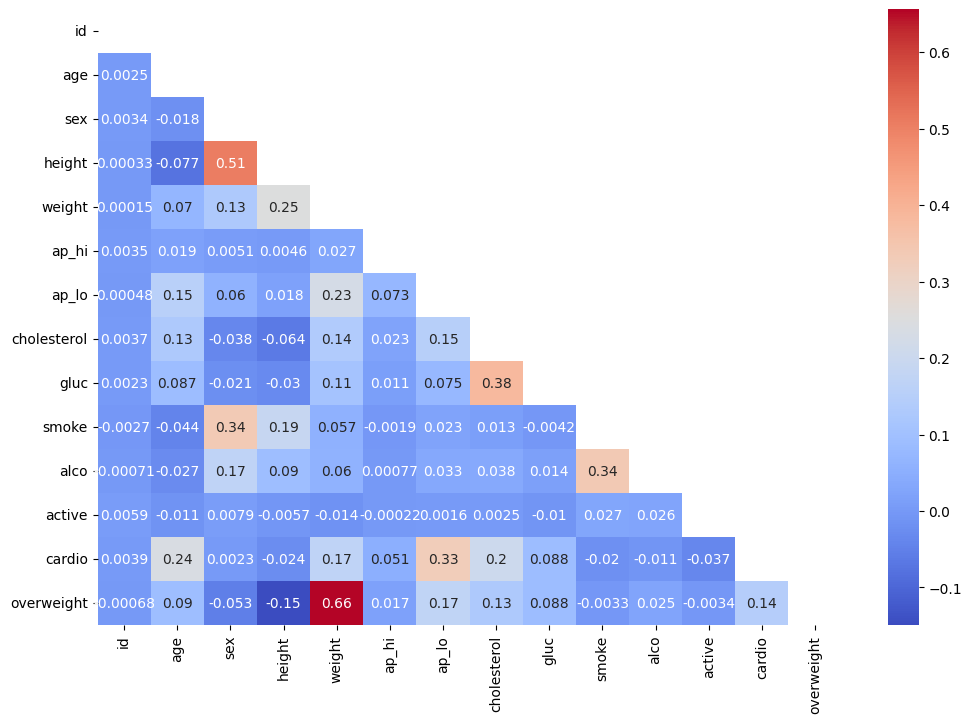

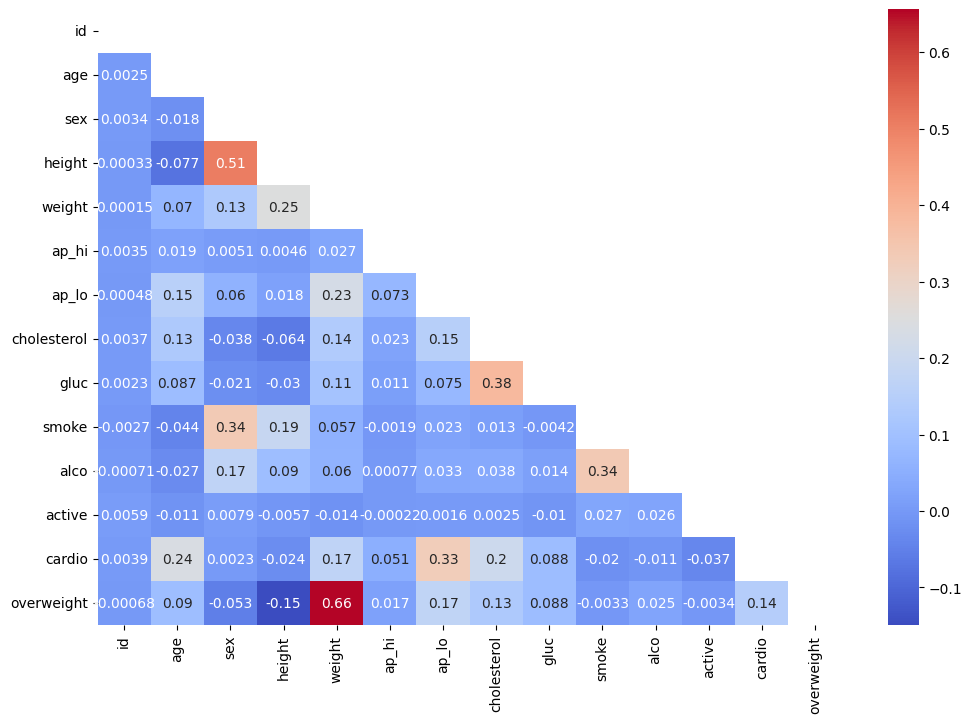

In [26]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()
